# Import des librairies

In [144]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()


# Partie 1 : Chargement et nettoyage des données

Import du fichier csv

In [145]:

routes = pd.read_csv('CGDRSGDRDTRoutesdernierstravaux.csv', sep = ';')

In [146]:
routes.head(10)

entityid       route  rub  age  mois  annee  \
0  000efbb3-e7c1-4b9c-a54e-1e0d6d81988a    76 D0131   20    0     7      7   
1  0011b2a4-5a64-4223-a856-6c9e8b6b2b48    76 D0293   20    0     7      7   
2  0011d99f-9091-4be4-a16c-354f23b24004    76 D0003   20    0     7      7   
3  00155332-804f-4547-8537-0897d7e479e1    76 D0915   20    0    11      9   
4  0016e2d9-78bb-4092-b846-90452703009a    76 D0022   20    0     7      7   
5  003419aa-3c96-48f8-beb9-8f4eddcb857c  76 E0418D2   20    0     1     10   
6  003587bb-5f73-4991-99b4-e735899b9736    76 D0109   20    0     7      7   
7  0057d94b-d85e-4d81-97c6-0cf180f12ad5    76 D0016   20    0     7      7   
8  005e178b-2c97-4bb7-9e7a-c8ae2295d4e1    76 D0925   20    0     7     11   
9  00606c44-4388-4b0b-a406-b87c2e5aa63e    76 D0481   20    0     7      7   

   prd   abd  prf   abf  cumuld  cumulf  long epaisseurdernierstravaux  \
0    0   490    3   200     490    3205  2715                      1,5   
1    6   724    6   940    6737    6953   216                        1   
2   51   708   51   810   50762   50864   102                        1   
3   61   800   62   711   61177   62116   939                        2   
4   86    26   86   650   86141   86765   624                        1   
5    0     0    0   219       0     219   219                        6   
6   16     0   20   233   15955   20226  4271                        4   
7   14   979   15   484   14923   15439   516                        1   
8   12   392   14   943   12820   15435  2615                        5   
9    3  1328    3  1571    4363    4606   243                        3   

   anneedernierstravaux naturedernierstravaux supportdernierstravaux  
0                  2012                 ES-BC                   COUL  
1                  2002                  COUL                     ES  
2                  1991                    ES                     AC  
3                  2000                  BBUM                   COUL  
4                  2006                  COUL                     BB  
5                  2008                  BBSG                     GB  
6                  2005                  BBSP                     ES  
7                  2002                  COUL                   COUL  
8                  2004                    BB                     ES  
9                  1994                  BBTM                     BB

# Affichage des types des colonnes


In [147]:
routes.dtypes

entityid                    object
route                       object
rub                          int64
age                          int64
mois                         int64
annee                        int64
prd                          int64
abd                          int64
prf                          int64
abf                          int64
cumuld                       int64
cumulf                       int64
long                         int64
epaisseurdernierstravaux    object
anneedernierstravaux         int64
naturedernierstravaux       object
supportdernierstravaux      object
dtype: object


##### epaisseurdernierstravaux n'est pas un réel, on va donc convertir la colonne

In [148]:
routes['epaisseurdernierstravaux'] = pd.to_numeric(routes['epaisseurdernierstravaux'],errors='coerce')

In [149]:
routes.head(5)

entityid     route  rub  age  mois  annee  prd  \
0  000efbb3-e7c1-4b9c-a54e-1e0d6d81988a  76 D0131   20    0     7      7    0   
1  0011b2a4-5a64-4223-a856-6c9e8b6b2b48  76 D0293   20    0     7      7    6   
2  0011d99f-9091-4be4-a16c-354f23b24004  76 D0003   20    0     7      7   51   
3  00155332-804f-4547-8537-0897d7e479e1  76 D0915   20    0    11      9   61   
4  0016e2d9-78bb-4092-b846-90452703009a  76 D0022   20    0     7      7   86   

   abd  prf  abf  cumuld  cumulf  long  epaisseurdernierstravaux  \
0  490    3  200     490    3205  2715                       NaN   
1  724    6  940    6737    6953   216                       1.0   
2  708   51  810   50762   50864   102                       1.0   
3  800   62  711   61177   62116   939                       2.0   
4   26   86  650   86141   86765   624                       1.0   

   anneedernierstravaux naturedernierstravaux supportdernierstravaux  
0                  2012                 ES-BC                   COUL  
1                  2002                  COUL                     ES  
2                  1991                    ES                     AC  
3                  2000                  BBUM                   COUL  
4                  2006                  COUL                     BB

# Nettoyage des données

On enlève toutes les valeurs nulles générées par la convertion de la colonne 'epaisseurdernierstravaux'

In [150]:
routes = routes.dropna()

In [151]:
routes.describe()

rub     age         mois        annee          prd          abd  \
count  4460.0  4460.0  4460.000000  4460.000000  4460.000000  4460.000000   
mean     20.0     0.0     7.384305     8.295964    18.152466   475.062780   
std       0.0     0.0     2.179195     2.166708    21.236799   415.151514   
min      20.0     0.0     1.000000     1.000000     0.000000     0.000000   
25%      20.0     0.0     7.000000     7.000000     3.000000   165.750000   
50%      20.0     0.0     7.000000     7.000000    11.000000   445.000000   
75%      20.0     0.0     8.000000     9.000000    25.000000   730.250000   
max      20.0     0.0    12.000000    50.000000   132.000000  8000.000000   

               prf          abf         cumuld         cumulf          long  \
count  4460.000000  4460.000000    4460.000000    4460.000000   4460.000000   
mean     19.275785   525.229148   18009.919955   19180.251794   1170.331839   
std      21.308448   415.033533   20641.818152   20692.356245   1328.525399   
min       0.000000     0.000000       0.000000       1.000000      1.000000   
25%       5.000000   231.750000    3524.500000    4665.000000    246.750000   
50%      12.000000   500.000000   11191.500000   12474.500000    690.000000   
75%      26.000000   763.000000   24527.250000   25880.500000   1648.250000   
max     134.000000  8000.000000  131215.000000  133893.000000  10992.000000   

       epaisseurdernierstravaux  anneedernierstravaux  
count               4460.000000           4460.000000  
mean                   2.955605           2003.227803  
std                    2.134374              6.823612  
min                    0.000000           1900.000000  
25%                    1.000000           2000.000000  
50%                    2.000000           2004.000000  
75%                    4.000000           2007.000000  
max                   30.000000           2014.000000

### J'ai décidé de supprimer les colonnes suivantes :
* age : 
Inutilisée, cette colonne n'a que des valeurs '0', elle ne sert donc à rien
* rub : 
Représentant le code thématique du fichier et ayant toujours la même valeur (20) je l'ai jugée inutile à notre analyse
* année :
Les valeurs n'ont aucun sens

In [152]:
del routes['age']

In [153]:
del routes['rub']

In [154]:
del routes['annee']

In [155]:
routes.head(5)


entityid       route  mois  prd  abd  prf  abf  \
1  0011b2a4-5a64-4223-a856-6c9e8b6b2b48    76 D0293     7    6  724    6  940   
2  0011d99f-9091-4be4-a16c-354f23b24004    76 D0003     7   51  708   51  810   
3  00155332-804f-4547-8537-0897d7e479e1    76 D0915    11   61  800   62  711   
4  0016e2d9-78bb-4092-b846-90452703009a    76 D0022     7   86   26   86  650   
5  003419aa-3c96-48f8-beb9-8f4eddcb857c  76 E0418D2     1    0    0    0  219   

   cumuld  cumulf  long  epaisseurdernierstravaux  anneedernierstravaux  \
1    6737    6953   216                       1.0                  2002   
2   50762   50864   102                       1.0                  1991   
3   61177   62116   939                       2.0                  2000   
4   86141   86765   624                       1.0                  2006   
5       0     219   219                       6.0                  2008   

  naturedernierstravaux supportdernierstravaux  
1                  COUL                     ES  
2                    ES                     AC  
3                  BBUM                   COUL  
4                  COUL                     BB  
5                  BBSG                     GB

# Partie 2 : Analyse 

* Affichage des 5 natures de travaux les plus fréquents

In [156]:
count_nat=routes['naturedernierstravaux'].value_counts(sort=True, ascending=False)
count_nat.head(5)

BB      1127
COUL     844
ES       687
BBSG     311
BBTM     236
Name: naturedernierstravaux, dtype: int64

* Affichage des moyennes d'épaisseurs et nombre de travaux par année + tri par ordre décroissant de moyenne

In [157]:
groupby_object = routes[['anneedernierstravaux', 'epaisseurdernierstravaux']]\
            .groupby(['anneedernierstravaux'])

a =groupby_object.agg('mean')\
        .rename(columns = lambda x: 'moyenne epaisseur')\
        .join(pd.DataFrame(groupby_object.size(), 
                    columns=['nombre de travaux']))

In [158]:
a.sort_values('moyenne epaisseur', ascending = False)

moyenne epaisseur  nombre de travaux
anneedernierstravaux                                      
1945                          10.000000                  2
1952                          10.000000                  2
1900                           6.000000                  4
1974                           6.000000                  1
1984                           6.000000                  7
1982                           6.000000                  2
1988                           5.400000                  5
1975                           5.333333                  3
1981                           5.200000                 10
1983                           4.444444                  9
2014                           4.337209                 86
1985                           4.285714                  7
1977                           4.000000                  1
1992                           3.888889                 27
1996                           3.743243                 74
1989                           3.700000                 30
1987                           3.625000                 16
1993                           3.611111                 36
1986                           3.583333                 12
2010                           3.555556                 63
1995                           3.508197                 61
1994                           3.507937                 63
1998                           3.468750                192
1990                           3.170213                 47
1991                           3.090909                 33
2002                           3.056180                356
2004                           3.019900                201
2005                           3.008929                336
1999                           2.995327                214
2001                           2.944099                322
2013                           2.887850                107
1997                           2.859813                107
2000                           2.792683                246
2012                           2.776316                152
2011                           2.725926                135
2007                           2.664921                382
2009                           2.646409                181
2006                           2.632653                441
2008                           2.578947                247
2003                           2.243697                238
1950                           0.000000                  1
1980                           0.000000                  1

# Graphes

### 1) Count / nature de travaux

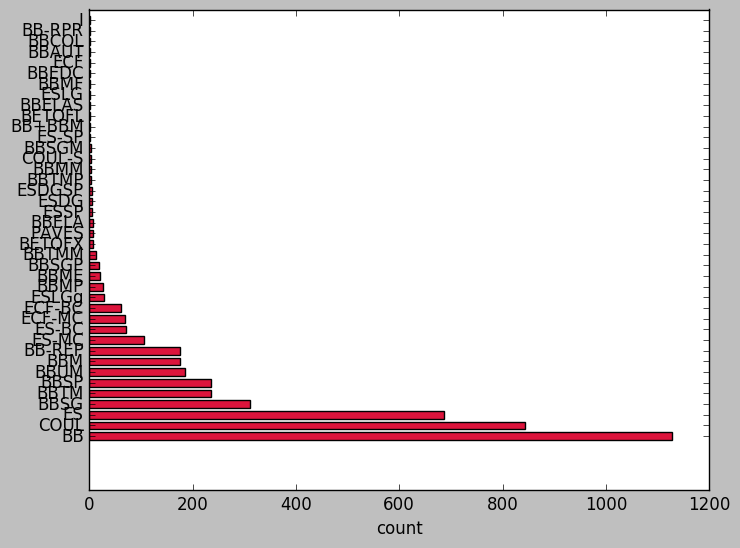

In [159]:

y_pos = np.arange(len(count_nat.index))
plt.barh(y_pos, count_nat, height = 0.7,align='center',color = 'crimson')
plt.yticks(y_pos, count_nat.index)
plt.xlabel('count')
plt.show()

### 2) Moyenne épaisseur / année

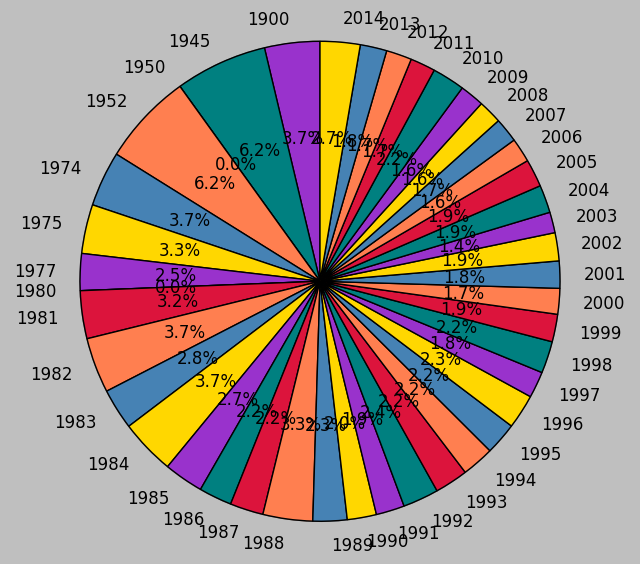

In [160]:
labels = a.index
sizes = a['moyenne epaisseur']

colors=['darkorchid','teal','crimson','coral','steelblue','gold']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,radius = 100)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')



plt.show()

### 3) Nombre de travaux / année

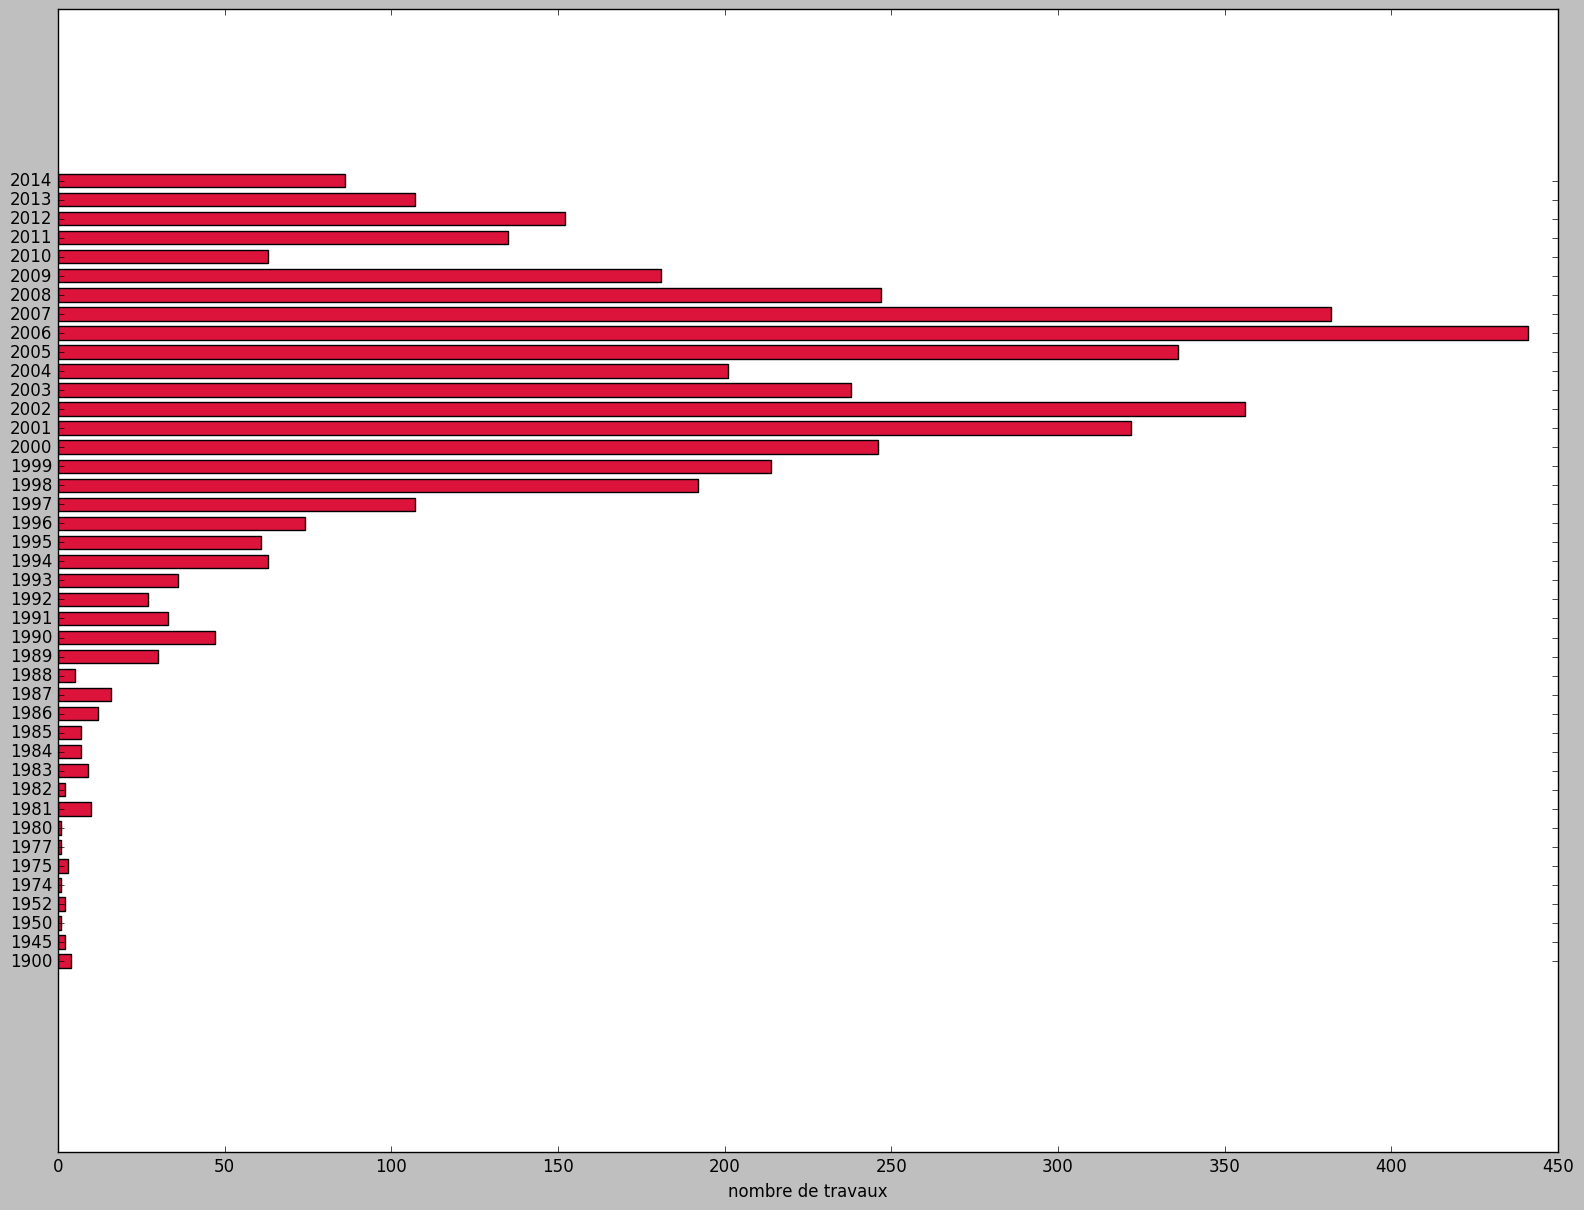

In [161]:

y_pos = np.arange(len(a.index))
plt.barh(y_pos, a['nombre de travaux'], height = 0.7,align='center',color = 'crimson')
plt.yticks(y_pos, a.index)
plt.tight_layout(rect=(4,4, 6, 6))
plt.xlabel('nombre de travaux')
plt.show()